In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results = 2,doc_content_chars_max = 500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print((arxiv.name))

arxiv


In [3]:
arxiv.invoke("Attention is all u need")

'Published: 2017-09-19\nTitle: Exploring Human-like Attention Supervision in Visual Question Answering\nAuthors: Tingting Qiao, Jianfeng Dong, Duanqing Xu\nSummary: Attention mechanisms have been widely applied in the Visual Question\nAnswering (VQA) task, as they help to focus on the area-of-interest of both\nvisual and textual information. To answer the questions correctly, the model\nneeds to selectively target different areas of an image, which suggests that an\nattention-based model may benefit fro'

In [4]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper = api_wrapper_wiki)
wiki.name

'wikipedia'

In [5]:
wiki.invoke('what is Machine Learning')

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [6]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "ReAct-Agent"

In [7]:
# Custom Functions

def multiply(a : int, b : int) -> int:
    """Multiply a and b.
    
    Args : 
        a: first int
        b : second int
        
    """
    return a * b

## This will be a tool
def add(a: int, b: int) -> int:
    """
    Adds a and b.
    
    Args:
        a: first int
        b: second int
    
    """
    
    return a + b

def divide(a: int, b: int) -> int:
    """
    Divide a and b.
    
    Args:
        a: first int
        b: second int
    
    """
    return a / b



In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\princ\AppData\Local\Temp\ipykernel_16196\735679136.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [9]:
tavily.invoke("Provide me the latest news of Artificial Intelligence")

[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': "ScienceDaily\n\n# Artificial Intelligence News\n\n## Top Headlines\n\n## Latest Headlines\n\n## Earlier Headlines\n\n### Tuesday, May 27, 2025\n\n### Thursday, May 22, 2025\n\n### Wednesday, May 21, 2025\n\n### Monday, May 19, 2025\n\n### Thursday, May 15, 2025\n\n### Wednesday, May 14, 2025\n\n### Tuesday, May 13, 2025\n\n### Monday, May 12, 2025\n\n### Thursday, May 8, 2025\n\n### Wednesday, May 7, 2025\n\n### Tuesday, May 6, 2025\n\n### Monday, May 5, 2025\n\n### Thursday, May 1, 2025\n\n### Wednesday, April 30, 2025 [...] ### Monday, April 28, 2025\n\n### Friday, April 25, 2025\n\n### Thursday, April 24, 2025\n\n### Wednesday, April 23, 2025\n\n### Tuesday, April 22, 2025\n\n### Monday, April 21, 2025\n\n### Wednesday, April 16, 2025\n\n### Tuesday, April 15, 2025\n\n### Monday, April 14, 2025\n\n### Thursday, April 10, 2025\n

In [10]:
## Combine all the tools in the list
tools = [arxiv, wiki, tavily, add, multiply, divide]

In [11]:
## Initilize my LLM Model

from langchain_groq import ChatGroq
llm = ChatGroq(model = "qwen/qwen3-32b")
llm_with_tools = llm.bind_tools(tools)

In [12]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent AI news. Let me see which tool I can use here. The available tools are arxiv, wikipedia, tavily_search_results_json, and the math functions. Since they want recent news, arxiv might have the latest papers, but tavily_search_results_json seems like a search engine that could provide recent articles. Wikipedia might not be the best for the very latest news. So I\'ll go with tavily_search_results_json. The query parameter should be "recent AI news". Let me structure the tool call accordingly.\n', 'tool_calls': [{'id': '6zbdytbnt', 'function': {'arguments': '{"query":"recent AI news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 143, 'prompt_tokens': 462, 'total_tokens': 605, 'completion_time': 0.481886712, 'prompt_time': 0.030358661, 'queue_time': 0.052980754000000005, 'total_time': 0.512245373}, 'model_name': 'qwen/q

In [13]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI news")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'recent AI news'},
  'id': 'a64k2a77b',
  'type': 'tool_call'}]

In [14]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph.message import add_messages, AnyMessage

In [15]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [16]:
from IPython.display import Image, display

def tool_calling_llm(state: State):
    return {"messages" : [llm_with_tools.invoke(state["messages"])]}


# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition,)
builder.add_edge("tools","tool_calling_llm")

graph = builder.compile()


tools_condition function internally returns two possible outputs:

"tool_use" → ToolNode ke edge pe jaata hai.

"end" → END node ke edge pe jaata hai (implicit default behavior).

Even though tumne explicitly builder.add_edge("tool_calling_llm", END) nahi likha,
LangGraph yeh automatically samajhta hai:

“Agar tools_condition 'end' return karega, toh graph END node pe jaayega.”

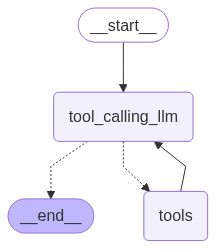

In [17]:
graph

In [20]:
messages = graph.invoke({"messages":HumanMessage(content="Provide me the top 5 recent AI news from march 3rd 2025, add 5 plus 5 and then multiply by 10")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Provide me the top 5 recent AI news from march 3rd 2025, add 5 plus 5 and then multiply by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (b6f6xqzeq)
 Call ID: b6f6xqzeq
  Args:
    query: top 5 AI news March 3 2025
  add (ex8xz0zt2)
 Call ID: ex8xz0zt2
  Args:
    a: 5
    b: 5
  multiply (fgt2cpak1)
 Call ID: fgt2cpak1
  Args:
    a: 10
    b: 10
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Weekly AI News: 3 March 2025 - AIforBusiness.net - LinkedIn", "url": "https://www.linkedin.com/pulse/weekly-ai-news-3-march-2025-aiforbusinessnet-johan-steyn-qrumf", "content": "This week’s AI update explores some of the most impactful developments shaping technology and society. OpenAI has unveiled GPT-4.5, a cutting-edge model with enhanced intuition and emo

# Agent Memory

In [21]:
messages = graph.invoke({"messages":HumanMessage(content="what is 5 plus 8")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is 5 plus 8
================================== Ai Message ==================================
Tool Calls:
  add (afb0r7y3d)
 Call ID: afb0r7y3d
  Args:
    a: 5
    b: 8
================================= Tool Message =================================
Name: add

13
================================== Ai Message ==================================

The result of 5 plus 8 is **13**.


In [22]:
messages = graph.invoke({"messages":HumanMessage(content="Divide that by 5")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Divide that by 5
================================== Ai Message ==================================

The query "Divide that by 5" is ambiguous because it references an undefined value ("that"). To proceed, I need clarification about what number or expression should be divided by 5. Please provide the specific value or context for "that."
